In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
import plotly.express as px

In [2]:
data_train=pd.read_csv('train.csv', index_col=0)
data_test=pd.read_csv('test.csv',index_col=0)

In [3]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Lets count the number of null values in our dataframe

In [5]:
data_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
data_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

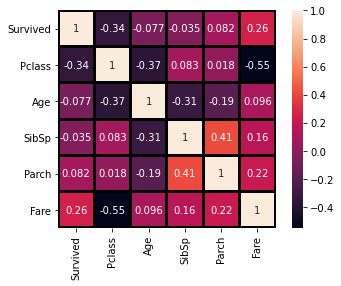

In [7]:
sns.heatmap(data_train.corr(), square=True, annot=True, linewidth=2,linecolor='black' )

In [8]:
numerical_columns = list(data_train.select_dtypes(include=['float64']))

In [9]:
numerical_columns

['Age', 'Fare']

In [10]:
data_train1=data_train.copy()

In [11]:
def scaler(df):
    scale=(df-df.mean())/df.std()
    return scale

In [12]:
for i in numerical_columns:
    data_train1[i]=data_train1[i].apply(lambda x: (x-data_train[i].mean())/data_train[i].std())

In [13]:
data_train1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,-0.530005,1,0,A/5 21171,-0.502163,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571430,1,0,PC 17599,0.786404,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,-0.254646,0,0,STON/O2. 3101282,-0.488580,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.364911,1,0,113803,0.420494,C123,S
5,0,3,"Allen, Mr. William Henry",male,0.364911,0,0,373450,-0.486064,NaN,S


In [14]:
data_train1['Age'].iplot(kind='hist',xTitle='Age', yTitle='Frequency')

In [15]:
data_train1['Fare'].iplot(kind='hist', xTitle='Fare', yTitle='Frequency')

In [16]:
data_train=data_train[data_train['Fare']<=400]

From the distribution plots above, it can be concluded that:

1: Age is approximately normally distributed.

2: Fare is right skewed having several outliers(i.e beyond 8th std deviation).


In [17]:
#Since we have a lot of missing data, lets fill the missing data first:


In [18]:
data_train.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.280984
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [19]:
def age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38.233441
        

        elif Pclass == 2:
            return 29.877630

        else:
            return 25.140620

    else:
        return Age
data_train['Age']=data_train[['Age','Pclass']].apply(age,1)
data_test['Age']=data_test[['Age','Pclass']].apply(age,1)

In [20]:
data_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       686
Embarked      2
dtype: int64

In [21]:
data_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [22]:
def drop(df):
    df=df.drop(['Cabin'],1)
    return df
data_train=drop(data_train)
data_test=drop(data_test)

In [23]:
data_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [24]:
data_test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64

In [25]:
data_train.dropna(inplace=True)

In [26]:
data_test['Fare'].fillna(np.median(data_test['Fare']))

PassengerId
892       7.8292
893       7.0000
894       9.6875
895       8.6625
896      12.2875
          ...   
1305      8.0500
1306    108.9000
1307      7.2500
1308      8.0500
1309     22.3583
Name: Fare, Length: 418, dtype: float64

Now since the missing data has been filled, lets
check the distribution of the target variable

In [27]:
data_train['Survived'].value_counts()

0    549
1    337
Name: Survived, dtype: int64

In [28]:
#As we can see, the data is imbalanced, 
#Lets balance the data first

In [29]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


For the development of our machine learning model, we dont need the name and the ticket. 

Hence, we will drop these features

In [30]:
data_train.drop(['Name','Ticket'],1, inplace=True)

In [31]:
data_test.drop(['Name','Ticket'],1, inplace=True)

For the development of our model, we must first

encode our data

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
def encode(df):
    categorical=list(df.select_dtypes(include=['category','object']))
    for feature in categorical:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

In [34]:
train=encode(data_train)
test=encode(data_test)

In [35]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [36]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,1
893,3,0,47.0,1,0,7.0000,2
894,2,1,62.0,0,0,9.6875,1
895,3,1,27.0,0,0,8.6625,2
896,3,0,22.0,1,1,12.2875,2


In [37]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [38]:
data_train.groupby(['Pclass'])['Fare'].mean()

Pclass
1    78.106279
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [39]:
def fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):

        if Pclass == 1:
            return 84.193516
        

        elif Pclass == 2:
            return 20.662183

        else:
            return 13.675550

    else:
        return Fare
test['Fare']=test[['Fare','Pclass']].apply(fare,1)

In [40]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

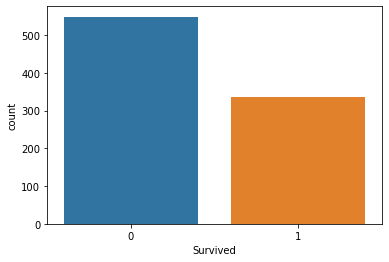

In [41]:
sns.countplot(train['Survived'])

Since our target variable is imbalanced, we need to perform resampling methods

In [42]:
from sklearn.utils import resample
df_majority = train[train.Survived==0]
df_minority = train[train.Survived==1]
 
df_minority_upsampled = resample(df_minority, 
                                 replace=True, 
                                 n_samples=len(df_majority),  
                                 random_state=33) 
 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['Survived'].value_counts()

1    549
0    549
Name: Survived, dtype: int64

In [43]:
X=df_upsampled.drop(['Survived'],1)
y=df_upsampled['Survived']

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [45]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [46]:
from sklearn.model_selection import train_test_split


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

In [64]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.597, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.571, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.577, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.682, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.549, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.665, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.653, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.697, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.600, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.682, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.640, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.790, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.801, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.818, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.823, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.743, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.790, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [65]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [66]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [79]:
logreg=LogisticRegression(C=1000, tol=0.001,  max_iter=1000 )
dtree=DecisionTreeClassifier()
rnd_clf=RandomForestClassifier(n_estimators=400)
ada=AdaBoostClassifier()
gradB=GradientBoostingClassifier()
Bag=BaggingClassifier()

In [80]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1000, max_iter=1000, tol=0.001)

In [81]:
y_pred=logreg.predict(X_test)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       112
           1       0.74      0.81      0.78       108

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220



In [83]:
classifiers=[dtree,rnd_clf,ada,gradB,Bag]
for i in classifiers:
    i.fit(X_train,y_train)
    Y_pred = i.predict(X_test)
    print("The classification report for {} is: \n".format(i))
    print(classification_report(y_test,Y_pred))
    print('='*60)

The classification report for DecisionTreeClassifier() is: 

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       112
           1       0.80      0.90      0.84       108

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220

The classification report for RandomForestClassifier(n_estimators=400) is: 

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       112
           1       0.80      0.88      0.84       108

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.84      0.83      0.83       220

The classification report for AdaBoostClassifier() is: 

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       112
           1       0.79      0.78      0.7

In [84]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
classifiers=[dtree,rnd_clf,ada,gradB,Bag]

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

,fpr,tpr,auc
classifiers,,,
DecisionTreeClassifier,"[0.0, 0.17857142857142858, 0.1875, 0.205357142...","[0.0, 0.8611111111111112, 0.8703703703703703, ...",0.862434
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.008928571428571428...","[0.0, 0.1574074074074074, 0.16666666666666666,...",0.936632
AdaBoostClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.009259259259259259, 0.0277777777777777...",0.877356
GradientBoostingClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.037037037037037035, 0.0555555555555555...",0.915013
BaggingClassifier,"[0.0, 0.03571428571428571, 0.03571428571428571...","[0.0, 0.5648148148148148, 0.5740740740740741, ...",0.918072


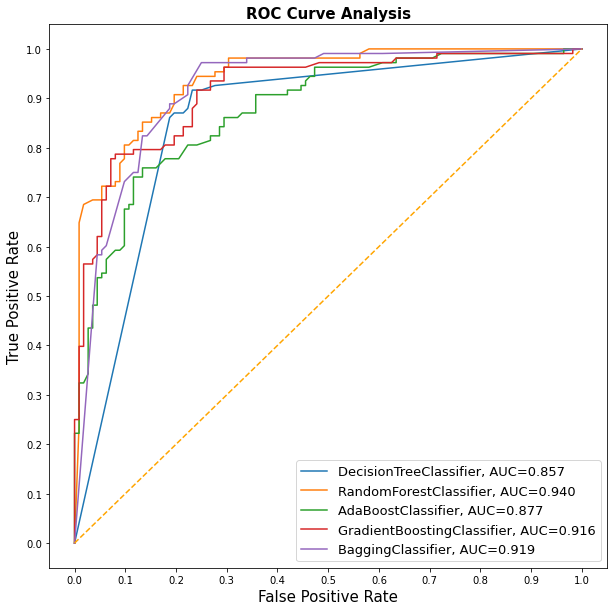

In [74]:
fig = plt.figure(figsize=(10,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']));
    
plt.plot([0,1], [0,1], color='orange', linestyle='--');

plt.xticks(np.arange(0.0, 1.1, step=0.1));
plt.xlabel("False Positive Rate", fontsize=15);

plt.yticks(np.arange(0.0, 1.1, step=0.1));
plt.ylabel("True Positive Rate", fontsize=15);

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15);
plt.legend(prop={'size':13}, loc='lower right');

Since random forest has the highest ROC_AUC score, we
will use it for our model prediction

In [75]:
y_pred_rnd=rnd_clf.predict(test)

In [76]:
test_df=pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
submission_titanic=pd.DataFrame()
ID=test_df['PassengerId']
submission_titanic['PassengerId']=ID
submission_titanic['Survived']=y_pred_rnd
submission_titanic.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [78]:
submission_titanic.to_csv('Submission_titanic.csv', index=False)

Lets upsample using SMOTE

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
smote=SMOTE(sampling_strategy='minority')


In [88]:
X_new=train.drop(['Survived'],1)
y_new=train['Survived']

In [89]:
X_sm,y_sm=smote.fit_sample(X_new,y_new)

In [90]:
y_sm.value_counts()

1    549
0    549
Name: Survived, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=33, stratify=y_sm)

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [94]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [95]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.534, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.591, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.591, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.543, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.699, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.636, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.710, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.623, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.611, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.699, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.818, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.829, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.766, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.727, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.670, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.750, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.669, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [96]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [97]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [100]:
classifiers=[dtree,rnd_clf,ada,gradB,Bag]
for i in classifiers:
    i.fit(X_train,y_train)
    Y_pred = i.predict(X_test)
    print("The classification report for {} is: \n".format(i))
    print(classification_report(y_test,Y_pred))
    print('='*60)

The classification report for DecisionTreeClassifier() is: 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       110
           1       0.81      0.81      0.81       110

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220

The classification report for RandomForestClassifier(n_estimators=400) is: 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.87      0.82      0.84       110

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220

The classification report for AdaBoostClassifier() is: 

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       110
           1       0.79      0.84      0.8

In [101]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
classifiers=[dtree,rnd_clf,ada,gradB,Bag]

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

,fpr,tpr,auc
classifiers,,,
DecisionTreeClassifier,"[0.0, 0.19090909090909092, 0.20909090909090908...","[0.0, 0.7909090909090909, 0.7909090909090909, ...",0.798099
RandomForestClassifier,"[0.0, 0.00909090909090909, 0.00909090909090909...","[0.0, 0.06363636363636363, 0.13636363636363635...",0.888554
AdaBoostClassifier,"[0.0, 0.0, 0.01818181818181818, 0.018181818181...","[0.0, 0.00909090909090909, 0.00909090909090909...",0.876529
GradientBoostingClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00909090...","[0.0, 0.00909090909090909, 0.17272727272727273...",0.899215
BaggingClassifier,"[0.0, 0.045454545454545456, 0.0454545454545454...","[0.0, 0.5545454545454546, 0.6727272727272727, ...",0.881364


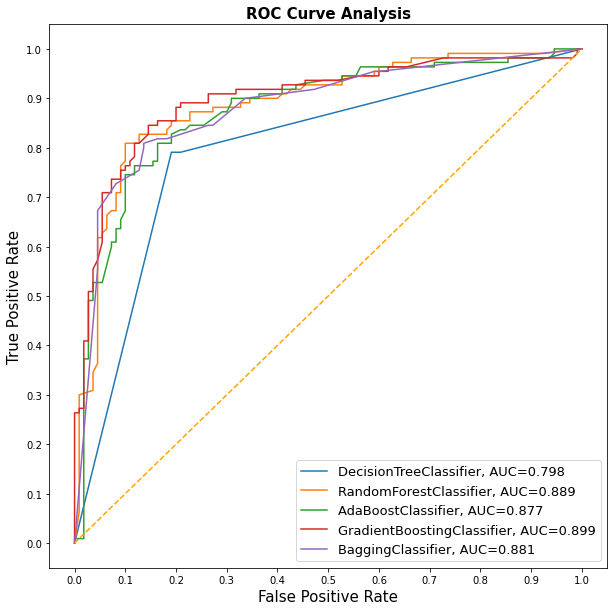

In [102]:
fig = plt.figure(figsize=(10,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']));
    
plt.plot([0,1], [0,1], color='orange', linestyle='--');

plt.xticks(np.arange(0.0, 1.1, step=0.1));
plt.xlabel("False Positive Rate", fontsize=15);

plt.yticks(np.arange(0.0, 1.1, step=0.1));
plt.ylabel("True Positive Rate", fontsize=15);

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15);
plt.legend(prop={'size':13}, loc='lower right');

Here, GradientBoosting has the highest ROC_AUC score, hence we'll
use it.

In [103]:
y_pred_gb=gradB.predict(test)

In [104]:
submission_titanic=pd.DataFrame()
ID=test_df['PassengerId']
submission_titanic['PassengerId']=ID
submission_titanic['Survived']=y_pred_gb
submission_titanic.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [105]:
submission_titanic['Survived'].value_counts()

0    278
1    140
Name: Survived, dtype: int64

In [106]:
submission_titanic.to_csv('Submission_titanic_smote.csv', index=False)